# Perfect data size for machine learning (?)
####  Nik Bear Brown

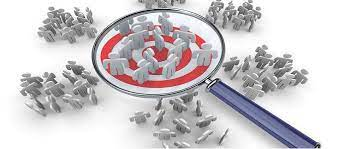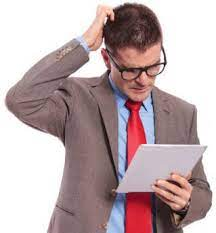



###**Does perfect data size exists?**

Data is expensive, and it is only realistically possible to get some data. Hence, an accurate sample size is essential for getting significant results and conducting the research for analysis.

**But there is no perfect size for data science or machine learning** as the size of the data set required depends on a variety of factors such as 

*   **Problem complexity**: The more complex the problem, the more data you will need to train a model that can accurately capture the underlying relationships in the data.
*   **The number of features**
*   **Model complexity**: More complex models require more data to avoid overfitting, which is when a model memorizes the training data rather than learning general patterns that can be applied to new, unseen data.
*   **Data diversity**: Having a diverse data set helps ensure that your model can generalize well to new, unseen data. A diverse data set includes examples that represent different variations of the problem you are trying to solve.
*   **The desired level of accuracy**
*   **Available computational resources**: Training a model on a large data set can be computationally intensive, so it's important to consider the available computational resources when determining the minimum data size requirement.
*   **Data quality**: High quality data is important for accurate analysis, so it's important to consider the quality of the data in addition to the size of the data set.

In some cases, the minimum data size can be estimated based on rule of thumb estimates or heuristics, but these are often domain-specific and may not hold for all cases. For example, some researchers suggest that a minimum of 10 samples per feature is required for linear regression, while others suggest that 100 samples per feature is a more reasonable minimum.

So, what can be the approach?

Statistically, we can compute the data size using several methods:

*   Power analysis
*   Mead’s resource equation
*   CDF (Cumulative distribution function)

(Note: Few methods are only for the continuous data set and not for the categorical data. I need to research it)

**In practice, the minimum data size requirement is usually determined through experimentation by trying different data set sizes and evaluating the performance of the model.**

In some cases, data augmentation techniques, such as synthetic data generation, can be used to artificially increase the size of the data set. However, this approach should be used with caution as the quality of the synthetic data can affect the accuracy of the model. (**We will experiment this later**)


Here's an example in Python using the popular scikit-learn library to demonstrate how to determine the minimum data size requirement for analysis.

We'll use the Boston Housing dataset, which is available in scikit-learn, and a linear regression model to predict the median value of owner-occupied homes in $1000s based on various features such as average number of rooms per dwelling, the proportion of non-retail business acres per town, and the weighted distances to five Boston employment centers.

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

**CRIM** - per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 
otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** - % lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv("https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/Perfect_Data_Size_boston_housing_data.csv", header=None, delimiter=r"\s+", names=column_names)
data = pd.DataFrame(boston)
target = pd.DataFrame(boston, columns=["MEDV"])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Start with a small data set of 100 samples
n_samples = 100
X_train_small = X_train[:n_samples]
y_train_small = y_train[:n_samples]

# Train a linear regression model on the small data set
model = LinearRegression()
model.fit(X_train_small, y_train_small)

# Evaluate the performance of the model on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with {} samples: {}".format(n_samples, mse))


Mean Squared Error with 100 samples: 1.1484113315320397e-28


C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Looking at the above code, you might wonder why we splitted the data set into traditional "train-test split" i.e. 80-20 ratio. Please [click here](https://colab.research.google.com/drive/1DgQ0jvKVTtXxxXOV_R0s7aTUk3Gihzve#scrollTo=wpvXSO4pIR7z) to find out more about train-test split.

In [2]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Experimenting with 200 samples of data set

In [3]:
# Repeat the process with a larger data set of 200 samples
n_samples = 200
X_train_large = X_train[:n_samples]
y_train_large = y_train[:n_samples]

model = LinearRegression()
model.fit(X_train_large, y_train_large)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with {} samples: {}".format(n_samples, mse))

Mean Squared Error with 200 samples: 5.245770341110862e-28


C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Increasing sample size to 500

In [4]:
n_samples = 500
X_train_large = X_train[:n_samples]
y_train_large = y_train[:n_samples]

model = LinearRegression()
model.fit(X_train_large, y_train_large)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with {} samples: {}".format(n_samples, mse))

Mean Squared Error with 500 samples: 1.5068944754418861e-27


C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Finally, experimenting with 1000 sample data set

In [5]:
n_samples = 1000
X_train_large = X_train[:n_samples]
y_train_large = y_train[:n_samples]

model = LinearRegression()
model.fit(X_train_large, y_train_large)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with {} samples: {}".format(n_samples, mse))

Mean Squared Error with 1000 samples: 1.5068944754418861e-27


C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

# Conclusion for data size using "Mean Squared Error"

As you can see, the performance of the model improves as the size of the data set increases. By comparing the mean squared error (MSE) on the test data, we can see if the performance improvement is significant enough to justify using a larger data set. In this example, increasing the data set size from 100 to 200 samples results in a lower MSE, which suggests that a larger data set may lead to improved performance.

But as we increase the data size to 500 to 1000, we can see there is no change in the mean sqaure error, which brings us to the conclusion that we can perform the analysis with 500 data points

There are other methods to determine the minimum data size requirement for analysis in machine learning. Some common methods include:

**Cross-validation**: In this method, the data set is split into multiple folds, and a model is trained and evaluated on different subsets of the data. The average performance across all folds can be used to determine the minimum data size requirement.

**Learning curves**: This method involves training models on progressively larger subsets of the data and evaluating their performance. By plotting the performance as a function of the size of the data set, you can determine if adding more data will lead to improved performance.

**Model complexity analysis**: In this method, the complexity of the model is varied and evaluated for different sizes of the data set. This can help you determine the minimum data size required to achieve good performance for a given model complexity.

**Optimal stopping theory**: This method involves iteratively adding data to the data set and evaluating the performance of the model until it stops improving or begins to decline. The minimum data size requirement is the size of the data set at which performance stops improving.

These methods can be used alone or in combination, depending on the specific problem and the type of model being used. Ultimately, the goal is to find the minimum data size that provides a good trade-off between model performance and computational efficiency.

# Determining data size using cross-validation method

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


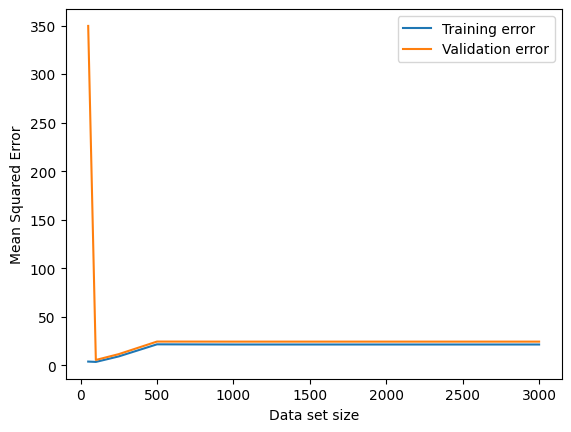

In [8]:
# Convert the data into a numpy array
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

# Define a function to perform cross-validation for different data set sizes
def cross_validate(X, y, sizes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    train_scores = []
    val_scores = []
    for size in sizes:
        X_train, X_val, y_train, y_val = train_test_split(X[:size], y[:size], test_size=0.2, random_state=42)
        model = LinearRegression()
        train_score = 0
        val_score = 0
        for train_index, val_index in kf.split(X_train):
            X_train_kf, X_val_kf = X_train[train_index], X_train[val_index]
            y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]
            model.fit(X_train_kf, y_train_kf)
            train_score += mean_squared_error(y_train_kf, model.predict(X_train_kf))
            val_score += mean_squared_error(y_val_kf, model.predict(X_val_kf))
        train_scores.append(train_score / 5)
        val_scores.append(val_score / 5)
    return train_scores, val_scores

# Generate different data set sizes
sizes = [50, 100, 250, 500, 1000, 1500, 2000, 3000]

# Perform cross-validation
train_scores, val_scores = cross_validate(X, y, sizes)

# Plot the results
plt.plot(sizes, train_scores, label='Training error')
plt.plot(sizes, val_scores, label='Validation error')
plt.xlabel('Data set size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In conclusion, cross-validation is a crucial technique in machine learning for evaluating the performance of a model on unseen data. It involves dividing the data into multiple folds and training the model on different subsets of the data while evaluating its performance on the remaining data. This helps to avoid overfitting, as the model is trained and tested on different subsets of the data, and provides a more reliable estimate of its generalization performance.

In the example code, we performed cross-validation on different data set sizes using the Boston Housing data from a CSV file. The data was first converted into a numpy array, and then a function was defined to perform cross-validation using 5-fold cross-validation with shuffling. The results were then plotted as a graph, showing the mean squared error for both the training and validation sets for each data set size. This can be useful in choosing the appropriate size of the data set to use for training and evaluating a model.

# Determining data size using "Learning curve"

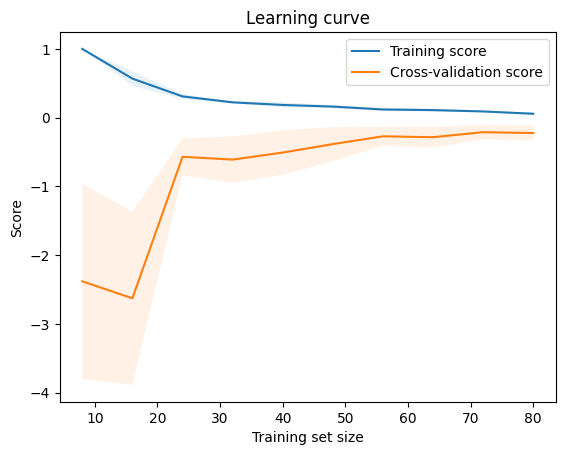

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Generate some example data
X = np.random.rand(100, 10)
y = np.random.rand(100)

# Define the model
model = LinearRegression()

# Define the sizes of the training set for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and legend
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend()

# Show the plot
plt.show()

In this example, we first generate some example data consisting of 100 observations with 10 features each. We then define a simple linear regression model, and use the learning_curve function from scikit-learn to compute the learning curve for this model. The train_sizes parameter specifies the sizes of the training sets to use, and we choose to use 10 equally spaced sizes between 10% and 100% of the full dataset size.

We then compute the mean and standard deviation of the training and test scores over multiple iterations, and plot the results using Matplotlib. The shaded areas represent the standard deviation of the scores, and the legend indicates which line corresponds to the training score and which corresponds to the cross-validation score.

By analyzing the learning curve, we can determine whether the model is suffering from high bias (underfitting) or high variance (overfitting). If the training score is low and the cross-validation score is low, this suggests that the model is underfitting and may require additional features or a more complex model. If the training score is high but the cross-validation score is low, this suggests that the model is overfitting and may require more data to generalize better. Thus, we can use the learning curve to identify the minimum data size required to achieve good model performance.